<a href="https://colab.research.google.com/github/adityadutt09/Phys498Projects/blob/main/Phys498_Project3_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

# **Creating a Hopfield Network**
The Hopfield Network model being implemented here consists of:
1. A state vector,   $s$ which can only take values of $+1$ or $-1$.
2. A symmetric weight matrix, $W$, containing no self-state weights.
3. A bias vector (or threshold), $b$, which can only take values of $+1$ or $-1$.

The activation function for this network is done by calculating the energy of the model which is represented as:

\begin{equation}
  E = -\frac{1}{2}(s^TWs + b \cdot s)
\end{equation}

The update algorithm for this network is implemented by observing whether the total weighted inputs to any state is greater than its threshold value (or bias). If this condition is true, the state is updated to $+1$. Otherwise, the state is $-1$.

In [ ]:
#Creating a Class to store the neural network model
class HopfieldNetwork:

  def __init__(self, n):
    self.state = np.zeros((n,1))
    self.bias = np.zeros((n,1))
    self.weights = np.zeros((n,n))
    
  #Revised
  def isConverged(self):
    total_weight = self.weights @ self.state
    for i in range(len(total_weight)):
      if(total_weight[i] > self.bias[i]):
        return False
    
    return True
  
  #Analogous to the activation function
  def calculateEnergy(self):
    return float(-0.5*(self.state.T @ self.weights @ self.state) + (self.bias.T @ self.state))
  
  def updateState(self):
    #Selecting a random neuron
    i = np.random.randint(0,len(self.state))

    #Compute total weight coming into it
    T = int(self.state.T @ self.weights[:, i]) - self.state[i]*self.weights[i,i] #The subtraction prevents double counting

    #Check if total weight greater than threshold bias
    if(T > self.bias[i]):
      self.state[i] = 1
    else:
      self.state[i] = -1

  #Getters and setters for state, weights and bias
  def setState(self, node, state):
    self.state[node] = state
  
  def getState(self, node):
    return self.state[node]
  
  def setBias(self, bias):
    for i in range(len(bias)):
      self.bias[i] = bias[i]
  
  def getBias(self):
    return self.bias
  
  def setWeights(self, weight):
    for i in range(len(weight)):
      for j in range(len(weight)):
        self.weights[i,j] = weight[i,j]
  
  def getWeights(self):
    return self.weights

# Simulating the Energy state

During our simulation we want to observe what happens to the energy of a model as it is being updated. Ideally, the total energy drops and reaches a minimum value as is expected of any physical system. 

To show this, we create 10 Hopfield networks with random initializations of the state, weights and biases, and allow the system to update for $n = 100$ iterations. Then we plot the energy of the model and observe how it changes with each update step. 

In [ ]:
n = 100
models = []

for k in range(10):
  models.append(HopfieldNetwork(n))
  for i in range(n):
    models[k].setState(i, np.random.choice([-1,1]))
    models[k].setBias(np.random.choice([-1,1], n))
    w = np.random.choice([-1,1], (n,n))
    w = np.tril(w) + np.triu(w.T,1)
    np.fill_diagonal(w, 0)
    models[k].setWeights(w)

Energy_list = []
for k in range(10):
  energy = []
  step = 1000

  while(step > 0):
    models[k].updateState()
    energy.append(models[k].calculateEnergy())
    step = step -1 

  Energy_list.append(energy)

Text(0.5, 1.0, 'Energy of Hopfield Networks during Simulation')

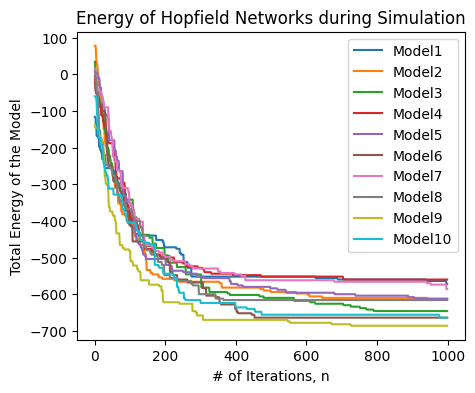

In [ ]:
plt.figure(figsize = (5,4))
for i in range(10):
  plt.plot(range(1000), Energy_list[i], label = 'Model' + str(i+1))

plt.xlabel('# of Iterations, n')
plt.ylabel('Total Energy of the Model')
plt.legend(loc = 'best')
plt.title('Energy of Hopfield Networks during Simulation')

**Training some Inputs**

**Let's start with 2 memories**

In [ ]:
def BinToState(memory):
  v = np.ones(len(memory))
  for i, num in enumerate(memory):
    if(num == '0'):
      v[i] = 0
      # v[i] = -1
    if(num == '1'):
      v[i] = 1
  return v

def StateToBin(state):
  u = ""
  for i, val in enumerate(state):
    if(val == -1 or val == 0):
      u = u + "0"
    if(val == 1):
      u += "1"
  
  return u

In [ ]:
#Converting binary numbers to neurons (+1, -1)
smiley = '0000000000000100010000000000000000000000000010000000000000000001110000001000100001000001101000000001'
tree   = '0001111000000111100000001100000000110000001111111000001100100000110000000011000000001100000000110000'

#Map
v1 = BinToState(smiley)
v2 = BinToState(tree)

In [ ]:
#Creating a HopfieldNetwork
hopnet = HopfieldNetwork(100)
hopnet.setBias(np.random.choice([-1,1], 100))

#Setting weight to remember the two images
W = 0.5*(v1 @ v1.T + v2 @ v2.T)
hopnet.setWeights(W)

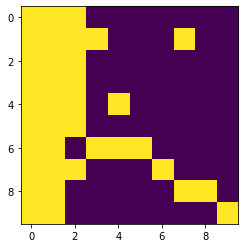

In [ ]:
#Corrupt the smiley face
corrupt_smiley = np.copy(v1.reshape(10,10))
# print(corrupt_smiley)
corrupt_smiley[0:10, 0:2] = 1
corrupt_smiley[0:6,2] = 1
plt.imshow(corrupt_smiley)

In [ ]:
#Input it as the intial state to the hopfield network
hopnet.state = corrupt_smiley.flatten()
# print(hopnet.state)

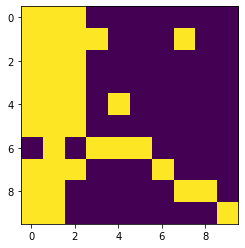

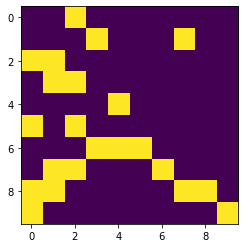

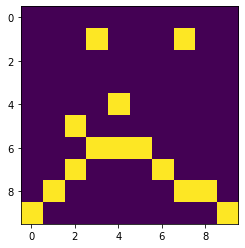

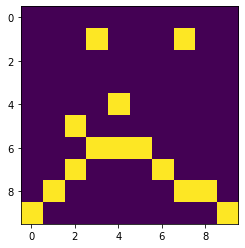

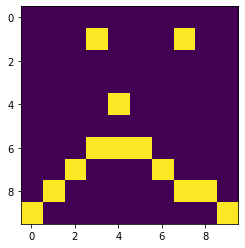

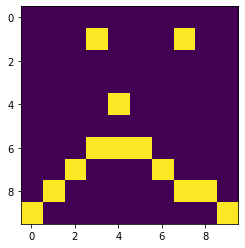

In [ ]:
#Simulate
for step in range(600):
  hopnet.updateState()
  if(step % 100 == 1):
    x = np.copy(hopnet.state)
    plt.figure()
    plt.imshow(x.reshape(10,10))

y = np.copy(hopnet.state)
plt.imshow(y.reshape(10,10))

**How many memories can be remembered?**

In [ ]:
n = 100 #Neurons
p = 5 #Number of memories to use
kmax = 60 #Maximum number of corrupted bits out of 100 bits

In [ ]:
#Creating p memories
memorylist = []

#Add  images
for i in range(200):
  memorylist.append(np.random.choice([-1,1], (100,1)))

In [ ]:
#Test
plt.imshow(memorylist[98].reshape(10,10))

In [ ]:
#Helper functions
def CorruptState(memory, k, shuffle_list):
  img = np.copy(memory)
  
  np.random.shuffle(shuffle_list)
  
  for bit in range(k):
    img[int(shuffle_list[bit])] = -1*img[int(shuffle_list[bit])]
  
  return img

def HammingDistance(original, new):
  i = 0
  count = 0
  while(i < len(original)):
    if(original[i] != new[i]):
      count += 1
    i += 1
  
  return count

def ComputeWeight(v):
  w = np.zeros((n,n))
  for k in range(len(v)):
    w += v[k] @ v[k].T
  return w/len(v)

In [ ]:
#Test
#1. CorruptState corrupts any image upto k bits
testimage = np.random.choice([-1,1], 100)
corrupttestimage = CorruptState(testimage, 20)

plt.figure()
plt.imshow(testimage.reshape(10,10))

plt.figure()
plt.imshow(corrupttestimage.reshape(10,10))

#2. Testing Hamming Distance
print(HammingDistance([0,0,0,0,0], [1,1,1,1,1]))

In [ ]:
#Every simulation takes the original image, the corrupted image to initialise and the number of images (p) to set the weights
n = 100
def Simulate(originalimage, corruptedimage, memories):
  #Instantiate the network
  hopnet = HopfieldNetwork(n)
  
  #Set the weights
  sum = np.zeros((n,n))
  for v in memories:
    sum = sum + v @ v.T
  hopnet.setWeights(sum/len(memories))

  #Set the initial state to the corrupted image
  hopnet.state = np.copy(corruptedimage)

  #Simulate
  for i in range(1000):
    hopnet.updateState()
  
  #Compute the Hamming Distance
  return HammingDistance(originalimage, hopnet.state)


In [ ]:
def GenerateHammingMatrix(p, kmax, memories):
  Hamming_matrix = np.zeros((p,kmax))
  hopnet = HopfieldNetwork(n)
  hopnet.bias = np.random.choice([-1,1], (n,1))

  shuffle_list = np.linspace(0, n-1, n)

  #Generate p memories (p:1->100)
  for num_memories in range(p):
    #Store p
    memories = [np.copy(memorylist[j]) for j in range(num_memories+1)]  
    
    #Encodes the memories into the network
    hopnet.weights = np.zeros(n)
    hopnet.weights = ComputeWeight(np.copy(memories))

    #Corrupt a random memory 
    for k in range(0, kmax):
      distances = np.zeros(20)
      
      #Select a random memory out of the list (p)
      index = np.random.randint(0, num_memories + 1)
      
      for i in range(20):

        #Corrupt the image
        hopnet.state = CorruptState(np.copy(memories[index]), k, shuffle_list)

        #Update the state
        for step in range(1000):
          hopnet.updateState()

        #Compute the Hamming Distance after Updating
        distances[i]= HammingDistance(memories[index], hopnet.state)
      
      Hamming_matrix[num_memories, k] = np.mean(distances)
  
  return Hamming_matrix

In [ ]:
H = GenerateHammingMatrix(100, 80, memorylist)

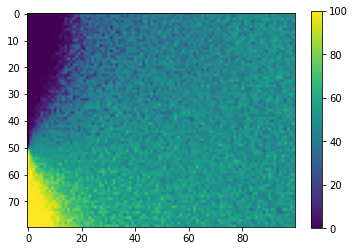

In [ ]:
plt.figure()
plt.imshow(H.T)
plt.colorbar()

**Looking at the Energy Landscapes**

In [ ]:
#Creating the states
theSize = 6
targetString = ""
oneString = ""

for i in range(theSize):
  targetString = targetString + "0"
  oneString = oneString + "1"

target = list(targetString)
one = list(oneString)

myStrings = dict()
myStrings[targetString] = 0
count = 0
while(targetString != oneString):
  digit = 0
  while(targetString[digit] == "1"):
    digit += 1
  if(digit != theSize):
    target[digit] = "1"
    for i in range(digit):
      target[i] = "0"
  
  targetString = "".join(target)
  count += 1
  myStrings[targetString] = count


print(myStrings)

{'000000': 0, '100000': 1, '010000': 2, '110000': 3, '001000': 4, '101000': 5, '011000': 6, '111000': 7, '000100': 8, '100100': 9, '010100': 10, '110100': 11, '001100': 12, '101100': 13, '011100': 14, '111100': 15, '000010': 16, '100010': 17, '010010': 18, '110010': 19, '001010': 20, '101010': 21, '011010': 22, '111010': 23, '000110': 24, '100110': 25, '010110': 26, '110110': 27, '001110': 28, '101110': 29, '011110': 30, '111110': 31, '000001': 32, '100001': 33, '010001': 34, '110001': 35, '001001': 36, '101001': 37, '011001': 38, '111001': 39, '000101': 40, '100101': 41, '010101': 42, '110101': 43, '001101': 44, '101101': 45, '011101': 46, '111101': 47, '000011': 48, '100011': 49, '010011': 50, '110011': 51, '001011': 52, '101011': 53, '011011': 54, '111011': 55, '000111': 56, '100111': 57, '010111': 58, '110111': 59, '001111': 60, '101111': 61, '011111': 62, '111111': 63}


Using Graphviz

In [ ]:
import graphviz

In [ ]:
n = 6
graph_memory1 = BinToState('{0:06b}'.format(45))
graph_memory2 = BinToState('{0:06b}'.format(38))

In [ ]:
#Create a hopnet with 7 neurons and teach it 2 memories:
graphnet = HopfieldNetwork(n)
#Learn the memories, Set the weights
w = 0.5*(graph_memory1 @ graph_memory1.T + graph_memory2 @ graph_memory2.T)
graphnet.weights = (w)
graphnet.bias = np.random.choice([-1,1], n)

In [ ]:
connections = []
Energies = []
for key in myStrings.keys():
  graphnet.state = np.copy(BinToState(str(key)))
  E_init = int(graphnet.calculateEnergy())
  Energies.append(E_init)
  for k in range(n):
    newState = BinToState(str(key))
    newState[k] = -newState[k]
    graphnet.state = np.copy(newState)
    if(int(graphnet.calculateEnergy()) - E_init < 0):
      connections.append( (myStrings[key], myStrings[ StateToBin(newState) ]))

In [ ]:
dot = graphviz.Digraph('Energy Landscape', comment = 'Energy Landscape')

for p in range(2**n):
  if (p == int(myStrings[StateToBin(graph_memory1)]) or p == int(myStrings[StateToBin(graph_memory2)])):
    dot.node(str(p), color = 'red')
  else:
    dot.node(str(p))

for i, j in connections:
  dot.edge(str(i), str(j))

dot.format = 'png'

In [ ]:
dot.render()

'Energy Landscape.gv.png'

Using Energies

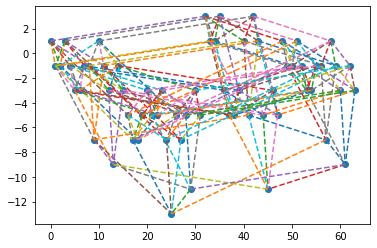

In [ ]:
ax = plt.axes()
ax.plot(list(myStrings.values()), Energies, 'o')
myDict = dict()
for i in range(len(myStrings)):
  myDict[i] = Energies[i]

for val in (connections):
  plt.plot([val[0], val[1]], [myDict[val[0]], myDict[val[1]]], '--')

**Restricted Boltzmann Machines**

Building an RBM Model

In [ ]:
import copy

In [ ]:
class RBM:

  def __init__(self, Nv, Nh):
    self.numHidden = Nh
    self.numVisible = Nv
    self.visible = np.zeros((Nv, 1))
    self.hidden = np.zeros((Nh, 1))
    self.weights = np.zeros((Nv, Nh))
    self.a = np.zeros((Nv,1))
    self.b = np.zeros((Nh,1))


  def Energy(self):
    return - int(self.visible.T @ self.weights @ self.hidden + self.visible.T @ self.a + self.hidden.T @ self.b)
  
  # def Energy(self, index):
  #   return  - int(self.visible[index, :] @ self.weights @ self.hidden[index, :].T + self.visible[index, :] @ self.a + self.hidden[index, :] @ self.b)

  def setVisibleState(self, node, vstate):
    self.visible[node] = vstate
  
  def getVisibleState(self, node):
    return self.visible[node]
  
  def setHiddenState(self, node, hstate):
    self.hidden[node] = hstate
  
  def getHiddenState(self, node):
    return self.hidden[node]
  
  def setaBias(self, bias):
    for i in range(len(bias)):
      self.a[i] = bias[i]
  
  def getaBias(self):
    return self.a
  
  def setbBias(self, bias):
    for i in range(len(bias)):
      self.b[i] = bias[i]
  
  def getbBias(self):
    return self.b
  
  def setWeights(self, weight):
    m,n = weight.shape
    for i in range(m):
      for j in range(n):
        self.weights[i,j] = weight[i,j]
  
  def getWeights(self):
    return self.weights

  # def condProbH(self):
  #   m = (self.visible @ self.weights) + self.b.T
  #   print(m.shape)
  #   return (np.exp(m)/(np.exp(m) + np.exp(-m)))

  def condProbH(self, index):
    m = self.visible.T @ self.weights[:,index] + self.b[index]
    return (np.exp(m)/(np.exp(m) + np.exp(-m)))
  
  # def condProbV(self):
  #   m =  self.hidden @ self.weights.T + self.a.T
  #   return (np.exp(m)/(np.exp(m) + np.exp(-m)))

  def condProbV(self, index):
    m = self.weights[index,:] @ self.hidden + self.a[index]
    return (np.exp(m)/(np.exp(m) + np.exp(-m)))

  def sampleHidden(self):
    # condProbs = self.condProbH()
    # print(condProbs.shape)
    # self.hidden = (condProbs > np.random.rand(condProbs.shape[0], self.numHidden)).astype(int)
    # self.hidden[self.hidden == 0] = -1
    
    for i in range(len(self.hidden)):
      if(self.condProbH(i) > np.random.rand()):
        self.hidden[i] = 1
      else:
        self.hidden[i] = -1 
  
  def sampleVisible(self):
    # condProbs = self.condProbV()
    # self.visible = condProbs > np.random.rand(condProbs.shape[0], self.numVisible).astype(int)
    # self.visible[self.visible == 0] = -1

    for i in range(len(self.visible)):
      if(self.condProbV(i) > np.random.rand()):
        self.visible[i] = 1
      else:
        self.visible[i] = -1 

In [ ]:
#Helper functions
def toString(data):
  temp = []
  for i in range(len(data)):
    if(data[i] == -1):
      temp.append('0')
    else:
      temp.append('1')
    
  return "".join(temp)

**Testing Gibbs Sampling**

In [ ]:
#Testing Gibbs Sampling
Nh = 2
Nv = 5

#Instantiating and setting initial values
rbm = RBM(Nv, Nh)
rbm.visible = np.random.choice([-1,1], (Nv,1))
rbm.hidden = np.random.choice([-1,1], (Nh,1))
rbm.setWeights(np.random.choice([-1,1], (Nv,Nh)))
rbm.setaBias(np.random.choice([-1,1], (Nv,1)))
rbm.setbBias(np.random.choice([-1,1], (Nh,1)))

In [ ]:
#Sample Hidden Layers, given V
probsH = dict()
normH = 0
for step in range(100000):
  rbm.sampleHidden()
  myString = toString(rbm.hidden)
  if myString not in probsH.keys():
    probsH[myString] = 0
  probsH[myString] += 1
  normH += 1

In [ ]:
#Analytical result for p(h|v)
#Since h = 2, all possible states are : 00, 01, 10, 11

theoryh_rbm = copy.deepcopy(rbm)
theory_prob_h = []

#H = 00
theoryh_rbm.hidden = np.array([-1,-1])
theory_prob_h.append(np.exp(-theoryh_rbm.Energy()))

#H = 01
theoryh_rbm.hidden = np.array([-1,1])
theory_prob_h.append(np.exp(-theoryh_rbm.Energy()))

#H = 10
theoryh_rbm.hidden = np.array([1,-1])
theory_prob_h.append(np.exp(-theoryh_rbm.Energy()))

#H = 11
theoryh_rbm.hidden = np.array([1,1])
theory_prob_h.append(np.exp(-theoryh_rbm.Energy()))

In [ ]:
theory_prob_h = theory_prob_h/np.sum(theory_prob_h)

In [ ]:
hsample = sorted(probsH)
hvalue = np.array([probsH[x] for x in hsample])
hvalue = hvalue/np.sum(hvalue)

In [ ]:
#Error
error = [float(x - y) for x,y in zip(hvalue, theory_prob_h)]
print(error)

[-0.0003768950189542708, 0.0007931049810457336, -0.00011310498104578036, -0.0003031049810457813]


Text(0.5, 1.0, 'Probability distribution for p(v|h)')

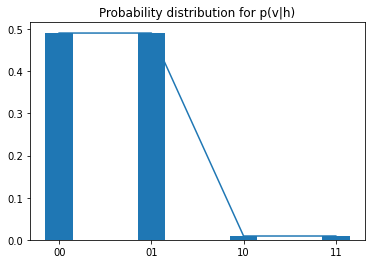

In [ ]:
# plt.plot(list(probsH.keys()), list(probsH.values()))
# plt.plot(theory_prob_h)
plt.figure()
plt.bar(hsample, hvalue, width = 0.3)
plt.plot(theory_prob_h)
plt.title('Probability distribution for p(v|h)')

In [ ]:
#Sample visible layers, given H
probsV = dict()
normV = 0

rbm.hidden = np.random.choice([-1,1], (2,1))

for step in range(100000):
  rbm.sampleVisible()
  myString = toString(rbm.visible)
  if myString not in probsV.keys():
    probsV[myString] = 0
  probsV[myString] += 1
  normV += 1

In [ ]:
# sum = 0
# for v in probsV.values():
#   sum = sum + v

for i in probsV:
  probsV[i] /= normV

In [ ]:
#Analytical result for p(v|h)
#Nv = 5, there are 2^5 possible states

theoryv_rbm = copy.deepcopy(rbm)
# theoryv_rbm.hidden = rbm.hidden
# theoryv_rbm.weights = (rbm.weights)
# theoryv_rbm.setaBias(rbm.getaBias())
# theoryv_rbm.setbBias(rbm.getbBias())

theory_prob_v = []

for i in range(2**5):
  bin = '{0:05b}'.format(i)
  ints = [int(x) for x in bin]
  conf = [1 if v == 1 else -1 for v in ints]
  conf_array = np.array(conf)
  theoryv_rbm.visible = np.copy(conf_array)
  theory_prob_v.append(np.exp(-theoryv_rbm.Energy()))

In [ ]:
theory_prob_v = theory_prob_v/np.sum(theory_prob_v)

In [ ]:
v_sample = sorted(probsV)

v_value = np.array([probsV[x] for x in v_sample])

v_sample = [int(v, 2) for v in v_sample]

error = [float(x - y) for x,y in zip(hvalue, theory_prob_h)]
print(error)

[-0.0003768950189542708, 0.0007931049810457336, -0.00011310498104578036, -0.0003031049810457813]


Text(0.5, 1.0, 'Probability distribution for p(v|h)')

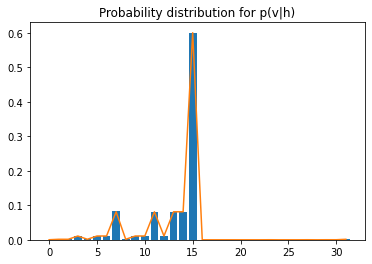

In [ ]:
plt.figure()
plt.bar(v_sample, v_value)
plt.plot(theory_prob_v, 'tab:orange')
plt.title('Probability distribution for p(v|h)')

In [ ]:
#Perform k = 10 iterations of Gibbs sampling
#Use original rbm
final_visconf = []
final_hidconf = []

#storing probabilities
joint_hist = np.zeros((2**5,2**2)) # p(v,h)
norm = 0 #Z value
# rbm.visible = np.random.choice([-1,1], (Nv,1))
# final_visconf.append(StateToBin(rbm.visible))

for step in range(100000):
  rbm.visible = np.random.choice([-1,1], (Nv,1))
  rbm.hidden = np.random.choice([-1,1], (Nh,1))

  final_visconf.append(StateToBin(rbm.visible))
  for k in range(10):
    rbm.sampleHidden()
    rbm.sampleVisible()
  
  final_visconf.append(StateToBin(rbm.visible))
  final_hidconf.append(StateToBin(rbm.hidden))

  #Storing unique entries into a dictionary
  v = int(StateToBin(rbm.visible),2)
  h = int(StateToBin(rbm.hidden),2)
  
  joint_hist[v,h] += 1
  norm += 1


In [ ]:
joint_hist = joint_hist/norm

In [ ]:
#Get the unique entries of v and h
unique_v, v_counts = np.unique(final_visconf, return_counts = True)
unique_h, h_counts = np.unique(final_hidconf, return_counts = True)

In [ ]:
print(len(unique_v))
print(len(unique_h))

32
4


In [ ]:
#p(v) = v_counts/norm
#p(h) = h_counts/norm
marginal_v = v_counts / np.sum(v_counts)
marginal_h = h_counts / np.sum(h_counts)

In [ ]:
theory_rbm = copy.deepcopy(rbm)

In [ ]:
#Theoretical results for p(v,h) , p(v), p(h)
theory_prob = np.zeros((2**5,2**2))

for i in range(2**5):
  binv = '{0:05b}'.format(i)
  theory_rbm.visible = BinToState(binv)
  
  for j in range(2**2):
    binh = '{0:02b}'.format(j)
    theory_rbm.hidden = BinToState(binh)
    
    theory_prob[i, j] = np.exp(-theory_rbm.Energy())

joint_prob = theory_prob.flatten()/np.sum(theory_prob)


#Wrong, fix this
marginal_prob_v = np.sum(theory_prob, axis = 1)/np.sum(theory_prob)
marginal_prob_h = np.sum(theory_prob, axis = 0)/np.sum(theory_prob)

Text(0.5, 1.0, 'Probability distribution vs theory curve for p(v,h)')

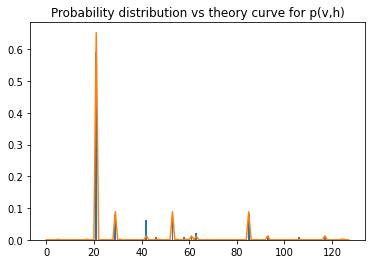

In [ ]:
#Histogram of p(v,h)
plt.figure()
plt.plot(joint_prob, 'tab:orange')
plt.bar(range(128), joint_hist.flatten())
plt.title('Probability distribution vs theory curve for p(v,h)')

Text(0.5, 1.0, 'Probability distribution vs theory curve for p(v)')

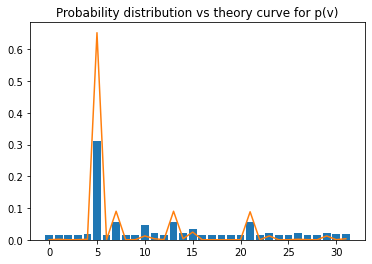

In [ ]:
#Histogram of p(v)
vsample = np.random.choice(range(0, 32), p = marginal_v, size = 100000)
plt.figure()
# plt.hist(vsample, density = True, bins = 32)
plt.bar(range(32), marginal_v)
plt.plot(marginal_prob_v, color = 'tab:orange')
plt.title('Probability distribution vs theory curve for p(v)')

Text(0.5, 1.0, 'Probability distribution vs theory curve for p(h)')

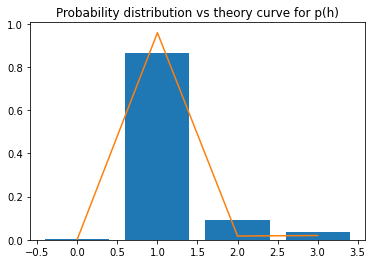

In [ ]:
#Histogram of p(h)
plt.figure()
plt.bar(range(4), marginal_h)
plt.plot(marginal_prob_h, color = 'tab:orange')
plt.title('Probability distribution vs theory curve for p(h)')

**Unsupervised Learning**

In [ ]:
class RBM_Model:

  def __init__(self, Nv, Nh):
    self.numHidden = Nh
    self.numVisible = Nv
    self.visible = np.zeros((1, Nv))
    self.hidden = np.zeros((1, Nh))
    self.weights = np.zeros((Nv, Nh))
    self.a = np.zeros((1, Nv))
    self.b = np.zeros((1, Nh))

  # def Energy(self, index):
  #   return  - int(self.visible[index, :] @ self.weights @ self.hidden[index, :].T 
  #                 + self.visible[index, :] @ self.a + self.hidden[index, :] @ self.b)

  def Energy(self):
    return  -(self.visible @ self.weights @ self.hidden.T + self.visible @ self.a.T + self.hidden @ self.b.T)

  def condProbH(self):
    m = (self.visible @ self.weights) + self.b
    return (np.exp(m)/(np.exp(m) + np.exp(-m)))

  def condProbV(self):
    m =  self.hidden @ self.weights.T + self.a
    return (np.exp(m)/(np.exp(m) + np.exp(-m)))

  def sampleHidden(self):
    condProbs = self.condProbH()
    self.hidden = (condProbs > np.random.rand(condProbs.shape[0], self.numHidden)).astype(int)
    self.hidden[self.hidden == 0] = -1
    
  def sampleVisible(self):
    condProbs = self.condProbV()
    self.visible = (condProbs > np.random.rand(condProbs.shape[0], self.numVisible)).astype(int)
    self.visible[self.visible == 0] = -1
  
  #Gradient Descent Function:
  def GradientDescent(self, data, k_iter):
  
    #1. Initialize the gradient variables
    myDeriv_weights, myDeriv_visible_bias, myDeriv_hidden_bias = 0, 0, 0

    #2. Sample the configurations in the mini-batch : number of rows represent number of samples, each row representing one visible vector
    # data will be of the shape : (minibatchsize x num_visible_neurons <- model.visible's shape)
    self.visible = np.copy(data)

    #3. Sample h, given p. Update the gradient variables
    self.sampleHidden()

    myDeriv_weights -= self.visible.T @ self.hidden
    myDeriv_visible_bias -= self.visible
    myDeriv_hidden_bias -= self.hidden

    #4. Perform k iterations of gibbs sampling. Update the gradient variables
    for k in range(k_iter):
      self.sampleHidden()
      self.sampleVisible()

    myDeriv_weights += (self.visible.T @ self.hidden)
    myDeriv_visible_bias += self.visible
    myDeriv_hidden_bias += self.hidden


    #Description of changing the parameters : given as
    return  (myDeriv_weights, np.mean(myDeriv_visible_bias, axis = 0), np.mean(myDeriv_hidden_bias, axis = 0))

  def trainRBM(self, minibatches, k_iter, eta, epochs):

    self.averageEnergy = []
    for step in range(epochs):
      average_energy_per_batch = []

      #go through each mini-batch:
      for batch in minibatches:

        #Free Energy before sampling
        F = 0
        F -= self.calculateFreeEnergySum(batch).T

        #Perform Gradient Descent on the entire mini-batch
        myDerivs = self.GradientDescent(batch, k_iter)

        #Update weights and biases
        self.weights -= (eta*myDerivs[0])/M
        self.a -= (eta*myDerivs[1])/M
        self.b -= (eta*myDerivs[2])/M

        #Find Change in Free Energy
        F += self.calculateFreeEnergySum(self.visible).T
        average_energy_per_batch.append(np.mean(F))

      self.averageEnergy.append(np.mean(average_energy_per_batch))

  def calculateFreeEnergyLog(self, v, h_list):
    self.visible = np.copy(v)
  
    sum = []  
    for h in h_list:
      self.hidden = np.copy(h)
      sum.append(np.exp(self.Energy()))
    return -np.log(np.sum(sum))

  def calculateFreeEnergySum(self, v):
    self.visible = np.copy(v)

    return self.a @ self.visible.T - np.sum( np.log( np.exp(self.b.T + self.weights.T @ self.visible.T) + np.exp(-self.b.T - self.weights.T @ self.visible.T) ) , axis = 0)


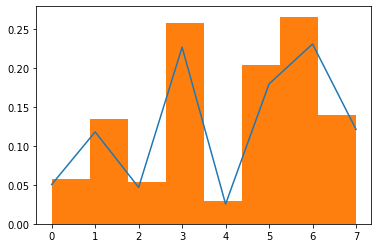

In [ ]:
#Creating a random probability distribution to test
prob_dist=np.random.ranf(8) #3 visible neurons : 2**3 = 8 possible states
prob_dist=prob_dist/np.sum(prob_dist)
samples=np.random.choice(range(0,8),p=prob_dist,size=100000)

### Below just for plotting the distribution you got
plt.plot(prob_dist)
plt.hist(samples,density=True,bins=8)
plt.show()

Training Algorithm

In [ ]:
def CreateMiniBatches(sample, N, M):
  np.random.shuffle(sample)

  #Convert them to states that can be stored by visible neurons
  newsample = [BinToState('{0:03b}'.format(i)) for i in sample]
  minibatches = []
  for x in range(0, N, M):
    minibatches.append(np.copy(newsample[x:x+M]))
  
  return minibatches

In [ ]:
#1. Initialize the weights Wij and biases ai, bj randomly.
#2. For each step (or epoch), loop over all the N data points in the training data set:
# 2.1 For each mini-batch, loop over M data points in the data set:
#  2.1.1 For the data points in the mini-batch, compute the average of the gradients dO/dWij, dO/dai, dO/dbj using Gibbs sampling
# 2.2 Update the weights and biases using the average gradients :
# Wij -> Wij - ndO/dWij
# ai -> ai - ndO/dai
# bj -> bj - ndO/dbj

#Constants
epochs = 10
N = 100000
M = 64
k_iter = 1
eta = 0.1

Nv = 3
Nh = 5

#Create the mini-batches
minibatches = CreateMiniBatches(samples, N, M)

#Initialise the RBM
rbm_model = RBM_Model(Nv,Nh)
rbm_model.weights = np.random.choice([-1.0,1.0], (Nv,Nh))
rbm_model.a = np.random.choice([-1.0,1.0], (1, Nv))
rbm_model.b = np.random.choice([-1.0,1.0], (1, Nh))

In [ ]:
#Train the rbm using the minibatches
rbm_model.trainRBM(minibatches, k_iter, eta, epochs)

In [ ]:
#Check p(v) if its right
final_visconf = []
for step in range(100000):
  rbm_model.visible = np.random.choice([-1,1], (1,Nv))
  rbm_model.hidden = np.random.choice([-1,1], (1,Nh))

  final_visconf.append(StateToBin(np.copy(rbm_model.visible.T)))
  for k in range(10):
    rbm_model.sampleHidden()
    rbm_model.sampleVisible()
  
  final_visconf.append(StateToBin(np.copy(rbm_model.visible.T)))
  # final_hidconf.append(StateToBin(rbm.hidden))

#Get the unique entries of v and h
unique_v, v_counts = np.unique(final_visconf, return_counts = True)
# unique_h, h_counts = np.unique(final_hidconf, return_counts = True)

marginal_v = v_counts / np.sum(v_counts)

In [ ]:
errorbar = prob_dist - marginal_v
print(errorbar)

[-0.04865366  0.01591933 -0.07714535  0.05347075 -0.04960457  0.05417247
  0.05651144 -0.00467041]


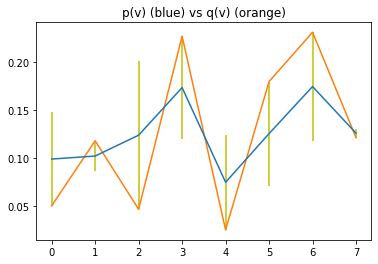

In [ ]:
plt.errorbar(range(8), marginal_v, yerr = errorbar, ecolor = 'y')
plt.plot(prob_dist, 'tab:orange')
plt.title('p(v) (blue) vs q(v) (orange)')
plt.show()

**Plotting average change in Free Energy as a function of Epoch**

Text(0, 0.5, 'Average change in F(v) per epoch')

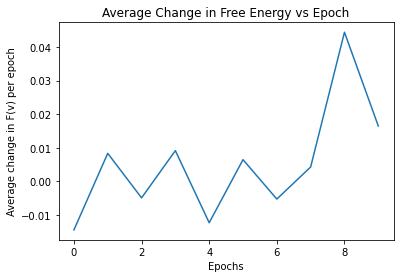

In [ ]:
#Plotting Average Change in Free energy vs Epoch
plt.figure()
plt.plot(range(epochs), rbm_model.averageEnergy)
plt.title('Average Change in Free Energy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Average change in F(v) per epoch')

Testing the Free Energy Functions

In [ ]:
#Test for 3 visible, 5 hidden
rmodel = RBM_Model(3,5)
rmodel.visible = np.random.choice([-1,1], (1,3))
rmodel.hidden = np.random.choice([-1,1], (1, 5))
# rmodel.weights = np.zeros((3,5))
rmodel.weights = np.random.choice([-1.0,1.0], (3,5))
# rmodel.a = np.zeros((1,3))
rmodel.a = np.random.choice([-1.0,1.0], (1,3))

# rmodel.b = np.zeros((1,5))
rmodel.b = np.random.choice([-1.0,1.0], (1,5))

In [ ]:
rmodel.calculateFreeEnergyLog(rmodel, np.ones((1,3)), hlist)

-8.44074414487332

In [ ]:
# rmodel.hidden = store
rmodel.calculateFreeEnergySum(rmodel, np.ones((1,3)))

-8.440744144873321

**MNIST**

In [ ]:
class rbm:

  def __init__(self, Nv, Nh):
    self.numHidden = Nh
    self.numVisible = Nv
    self.visible = np.zeros((1, Nv))
    self.hidden = np.zeros((1, Nh))
    self.weights = np.zeros((Nv, Nh))
    self.a = np.zeros((1, Nv))
    self.b = np.zeros((1, Nh))

  def Energy(self):
    return  -(self.visible @ self.weights @ self.hidden.T + self.visible @ self.a.T + self.hidden @ self.b.T)

  def condProbH(self):
    m = (self.visible @ self.weights) + self.b
    return (np.exp(m)/(np.exp(m) + np.exp(-m)))

  def condProbV(self):
    m =  self.hidden @ self.weights.T + self.a
    return (np.exp(m)/(np.exp(m) + np.exp(-m)))

  def sampleHidden(self):
    condProbs = self.condProbH()
    self.hidden = (condProbs > np.random.rand(condProbs.shape[0], self.numHidden)).astype(int)
    # self.hidden[self.hidden == 0] = -1
    
  def sampleVisible(self):
    condProbs = self.condProbV()
    self.visible = (condProbs > np.random.rand(condProbs.shape[0], self.numVisible)).astype(int)
    # self.visible[self.visible == 0] = -1
  
  #Gradient Descent Function:
  def GradientDescent(self, data, k_iter):
    
    #1. Initialize the gradient variables
    myDeriv_weights, myDeriv_visible_bias, myDeriv_hidden_bias = 0, 0, 0

    #2. Sample the configurations in the mini-batch : number of rows represent number of samples, each row representing one visible vector
    # data will be of the shape : (minibatchsize x num_visible_neurons <- model.visible's shape)
    self.visible = np.copy(data)

    #3. Sample h, given p. Update the gradient variables
    self.sampleHidden()

    myDeriv_weights -= self.visible.T @ self.hidden
    myDeriv_visible_bias -= self.visible
    myDeriv_hidden_bias -= self.hidden

    #4. Perform k iterations of gibbs sampling. Update the gradient variables
    for k in range(k_iter):
      self.sampleHidden()
      self.sampleVisible()

    myDeriv_weights += (self.visible.T @ self.hidden)
    myDeriv_visible_bias += self.visible
    myDeriv_hidden_bias += self.hidden

    return  (myDeriv_weights, np.mean(myDeriv_visible_bias, axis = 0), np.mean(myDeriv_hidden_bias, axis = 0))

  def trainRBM(self, minibatches, k_iter, eta, epochs):

    self.averageEnergy = []
    for step in range(epochs):
      average_energy_per_batch = []

      #go through each mini-batch:
      for batch in minibatches:
        #batch size
        M = batch.shape[0]

        #Free Energy before sampling
        F = 0
        F -= self.calculateFreeEnergySum(batch).T

        #Perform Gradient Descent on the entire mini-batch
        myDerivs = self.GradientDescent(batch, k_iter)

        #Update weights and biases
        self.weights -= (eta*myDerivs[0])/M
        self.a -= (eta*myDerivs[1])/M
        self.b -= (eta*myDerivs[2])/M

        #Find Change in Free Energy
        F += self.calculateFreeEnergySum(self.visible).T
        average_energy_per_batch.append(np.mean(F))

      self.averageEnergy.append(np.mean(average_energy_per_batch))

  def calculateFreeEnergyLog(self, v, h_list):
    self.visible = np.copy(v)
  
    sum = []  
    for h in h_list:
      self.hidden = np.copy(h)
      sum.append(np.exp(self.Energy()))
    return -np.log(np.sum(sum))

  def calculateFreeEnergySum(self, v):
    self.visible = np.copy(v)

    return self.a @ self.visible.T - np.sum( np.log( 1.0 + np.exp(-self.b.T - self.weights.T @ self.visible.T) ) , axis = 0)



*Getting the Data*

In [ ]:
from keras.datasets import mnist

In [ ]:
#trainX contrains the images in matrix form (28 x 28) so can be easily plotted.
(trainX, trainY), (testX, testY) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(trainX.shape)

(60000, 28, 28)


In [ ]:
data = trainX[0:64, :]
len(data)

64

In [ ]:
def PlotMe(data):
  image = np.ones((8*28, 8*28))
  count = 0
  for i in range(0, 8*28, 28):
    for j in range(0, 8*28, 28):
      image[i:i+28, j:j+28] = np.copy(data[count])
      count += 1

  plt.imshow(image)

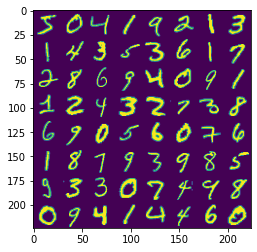

In [ ]:
PlotMe(data)

In [ ]:
#Pre-processing the data
def ProcessData(data):
  data.flatten()
  data = (data > np.random.rand(len(data)))
  return data.flatten()

In [ ]:
def CreateMiniBatchesGrid(sample, N, M):
  np.random.shuffle(sample)

  #Convert them to states that can be stored by visible neurons
  newsample = [ProcessData(data) for data in trainX]
  
  minibatches = []
  for x in range(0, N, M):
    minibatches.append(np.copy(newsample[x:x+M]))
  
  return minibatches

In [ ]:
#MNIST Parameters
#May want to test nh = 400
mnist = { 'mnist_eta' : 0.1, 'minibatchsize' : 64, 'num_visible_neurons' : 784, 'num_hidden_neurons' : 10, 'epochs' : 30 }

In [ ]:
#Creating the minibatches
minibatches = CreateMiniBatchesGrid(trainX, len(trainX), mnist['minibatchsize'])

In [ ]:
#Testing shapes
x = np.copy(minibatches[0])
x = np.reshape(x, (64, 28, 28))

In [ ]:
#Initialising the model and training
model = rbm(mnist['num_visible_neurons'], mnist['num_hidden_neurons'])
model.weights = np.random.uniform(-0.01, 0.01, size = (mnist['num_visible_neurons'], mnist['num_hidden_neurons']))
model.a = np.random.uniform(-0.01, 0.01, size = (1, mnist['num_visible_neurons']))
# model.b = np.zeros((1, mnist['num_hidden_neurons']))

In [ ]:
#Train the rbm
model.trainRBM(minibatches, 1, mnist['mnist_eta'], mnist['epochs'])

**Testing the Machine**

1. Reconstruction

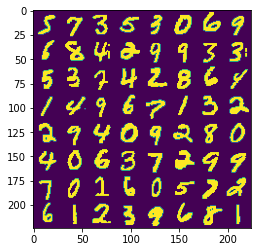

In [ ]:
#Reconstruction

#1. Set the visible to some data:
model.visible = np.copy(minibatches[0])

#Definition image
PlotMe(np.reshape(np.copy(model.visible), (64, 28, 28)))

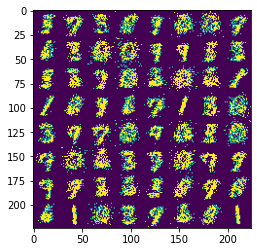

In [ ]:
#Sample Hidden and Visible once
model.sampleHidden()
model.sampleVisible()

PlotMe(np.reshape(np.copy(model.visible), (64, 28, 28)))

In [ ]:
x = [str(i) for i in np.array([1,0,1,1])]
"".join(x)

'1011'

In [ ]:
def SampleVisibleProb(model):
  
  sum = np.zeros((model.visible.shape[0], model.visible.shape[1]))

  for step in range(1000):
    model.sampleVisible()
    sum += np.copy(model.visible)
  
  return sum/1000.

In [ ]:
model.visible = np.copy(minibatches[0])

model.sampleHidden()

x = SampleVisibleProb(model)

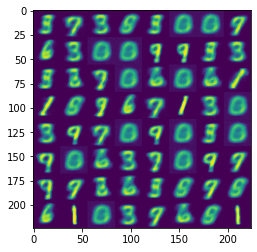

In [ ]:
#Plot this probability distribution
plt.figure()
PlotMe(np.reshape(np.copy(x), (64,28,28)))

In [ ]:
model.visible = np.copy(minibatches[0])
model.visible[0:int(model.visible.shape[0]/2), 0:int(model.visible.shape[1]/2)] = 0

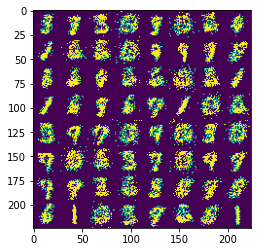

In [ ]:
model.sampleHidden()
model.sampleVisible()

PlotMe(np.reshape(np.copy(model.visible), (64, 28, 28)))

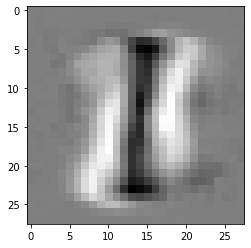

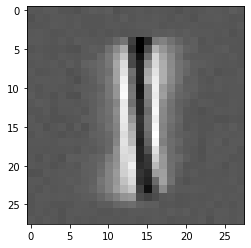

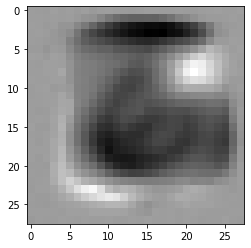

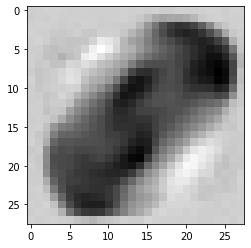

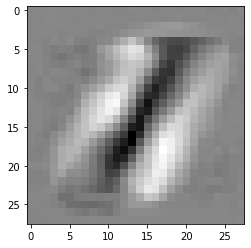

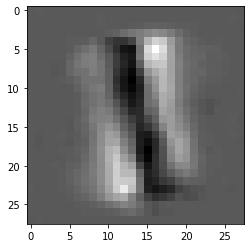

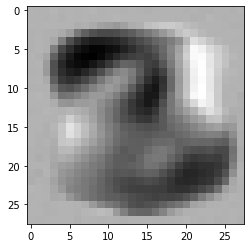

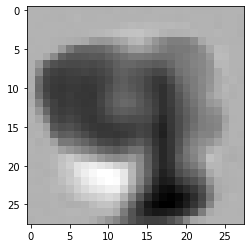

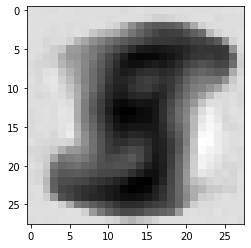

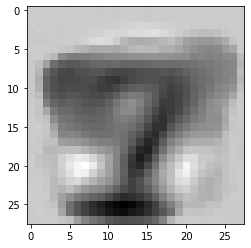

In [ ]:
#Visualisation of the weights
# PlotMe(np.reshape(np.copy(model.visible), (64, 28, 28)))
#For 10 hidden spins: 10 images.
for i in range(mnist['num_hidden_neurons']):
  plt.figure()
  plt.imshow(np.copy(model.weights[:, i]).reshape(28,28), cmap = plt.cm.binary)

Text(0, 0.5, 'Average change in F(v) per epoch')

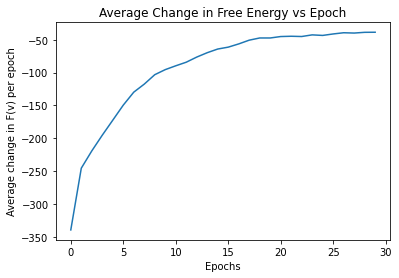

In [ ]:
#Plotting Free Energy vs Epoch
#Plotting Average Change in Free energy vs Epoch
plt.figure()
plt.plot(range(mnist['epochs']), model.averageEnergy)
plt.title('Average Change in Free Energy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Average change in F(v) per epoch')

In [ ]:
#Free energy of noise vs a learned digit:
F_learn = model.calculateFreeEnergySum(minibatches[0])
F_random = model.calculateFreeEnergySum(np.random.choice([0,1], size = (64,784)))

# print('Free Energy of a trained image =', F_learn)
# print('Free Energy of random noise = ', F_random)

In [ ]:
F_learn /= np.sum(F_learn)

print(F_learn)
print(np.mean(F_learn))

[[0.02142048 0.01291241 0.02451283 0.00698587 0.00154919 0.01746324
  0.01958074 0.01394177 0.00566084 0.00351294 0.01538182 0.01315914
  0.035212   0.02023109 0.01909309 0.01416289 0.00854469 0.01580154
  0.01882286 0.0162812  0.0164878  0.0161941  0.02358925 0.02827583
  0.01678846 0.01702321 0.01394718 0.01366812 0.00606405 0.01586791
  0.01221283 0.01285737 0.02178259 0.0182683  0.01529368 0.02792357
  0.01220062 0.01488989 0.02704388 0.01630267 0.01912582 0.00279876
  0.01228004 0.02120806 0.01235089 0.01260019 0.01814596 0.02444343
  0.01860152 0.00262137 0.00586408 0.02158193 0.02876811 0.02040448
  0.00683616 0.01368986 0.01763968 0.01308439 0.00566048 0.01939182
  0.01292299 0.02009575 0.0163829  0.00258938]]
0.015625


In [ ]:
F_random /= np.sum(F_random)
print(F_random)
print(np.mean(F_random))

[[0.01510546 0.01649608 0.01710694 0.01502559 0.01612367 0.01595255
  0.01538948 0.01621161 0.01539317 0.01722774 0.01516966 0.01468341
  0.01469774 0.01574145 0.01597849 0.01518579 0.01569247 0.01644502
  0.01517207 0.01592076 0.01534622 0.01463807 0.01641926 0.01495149
  0.01528925 0.01591066 0.01473717 0.01436025 0.01663443 0.01649808
  0.0157003  0.01553511 0.01467566 0.01534802 0.01688159 0.01579277
  0.01520809 0.01565215 0.01553159 0.01511594 0.01568445 0.0159283
  0.01542387 0.01557284 0.01561271 0.01509918 0.01634454 0.01552066
  0.01512084 0.01549803 0.01609046 0.01577355 0.01605697 0.01612766
  0.01609786 0.01564154 0.01501966 0.01544409 0.01649984 0.01491703
  0.01541877 0.01557362 0.01490977 0.01567854]]
0.015625000000000003
